<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# DETECCION DE VEHICULOS CON HOG Y SVM
### www.gti.ssr.upm.es/data/Vehicle_database.html

# Se cargan las bibliotecas necesarias

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

# Se importan los dos datasets 
### https://docs.python.org/3/library/glob.html

In [6]:
import glob
pedestrian = glob.glob("dataset_2/ped_examples/*.pgm")
no_pedestrian = glob.glob("dataset_2/non-ped_examples/*.pgm")

In [8]:
len(pedestrian)

4470

In [9]:
len(no_pedestrian)

5000

# Se muestra una imagen con vehículo

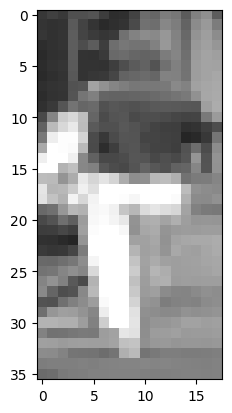

In [10]:
img_gray = cv2.imread(pedestrian[10])
plt.imshow(img_gray)

# Para fines de demostración se calcula el HOG de la imagen

In [12]:
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_BGR2GRAY)

In [13]:
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [14]:
features.shape

(0,)

In [15]:
hog_img.shape

(36, 18)

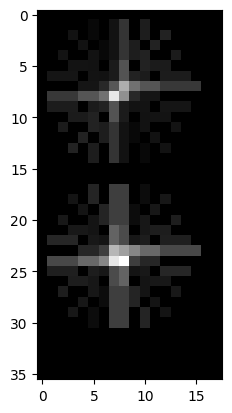

In [16]:
plt.imshow(hog_img,cmap = 'gray')

# Se extraen las features del HOG para ambos tipos de datos

In [45]:
pedestrian_hog_accum = []

for i in pedestrian:
    img_color = mpimg.imread(i)
    #img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    img_gray=img_color
    
    vehicle_hog_feature, vehicle_hog_img = hog(img_gray,
                                               orientations = 9,
                                               pixels_per_cell = (6,6),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    pedestrian_hog_accum.append(vehicle_hog_feature)

In [46]:
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
y_pedestrian = np.ones(len(X_pedestrian))

In [47]:
X_pedestrian.shape

(4470, 360)

In [48]:
y_pedestrian.shape

(4470,)

In [49]:
no_pedestrian_hog_accum = []

for i in no_pedestrian:
    img_color = mpimg.imread(i)
    #img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    img_gray=img_color
    
    novehicle_hog_feature, novehicle_hog_img = hog(img_gray,
                                               orientations = 9,
                                               pixels_per_cell = (6,6),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    no_pedestrian_hog_accum.append(novehicle_hog_feature)

In [50]:
X_nopedestrian = np.vstack(no_pedestrian_hog_accum).astype(np.float64)
y_nopedestrian = np.zeros(len(X_nopedestrian))

In [51]:
X_nopedestrian.shape

(5000, 360)

In [52]:
y_nopedestrian.shape

(5000,)

# Se combinan ambos tipos de datos para alimentar el SVM

In [53]:
X = np.vstack((X_pedestrian,X_nopedestrian))
X.shape

(9470, 360)

In [54]:
y = np.hstack((y_pedestrian,y_nopedestrian))
y.shape

(9470,)

# Se generan los datos de entrenamiento y de prueba

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
X_train.shape

(6629, 360)

In [57]:
X_test.shape

(2841, 360)

# Se importa el Clasificador y se entrena

In [58]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [59]:
y_predict = svc_model.predict(X_test)

<Axes: >

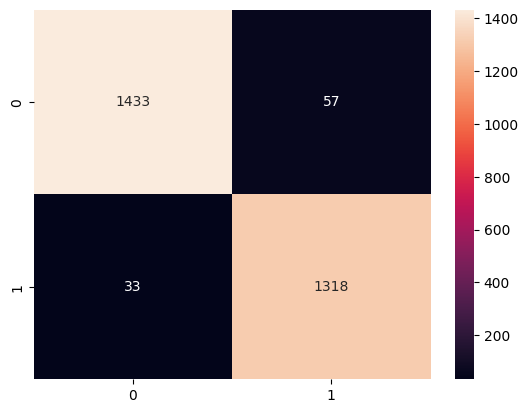

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1490
         1.0       0.96      0.98      0.97      1351

    accuracy                           0.97      2841
   macro avg       0.97      0.97      0.97      2841
weighted avg       0.97      0.97      0.97      2841



# GridSearchCV

In [62]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [63]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=  23.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=  29.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=  18.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=  23.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=  30.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=  15.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=  10.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=  10.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=  10.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=  11.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.841 total time=  16.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [64]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [65]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [66]:
grid_predictions = grid.predict(X_test)

<Axes: >

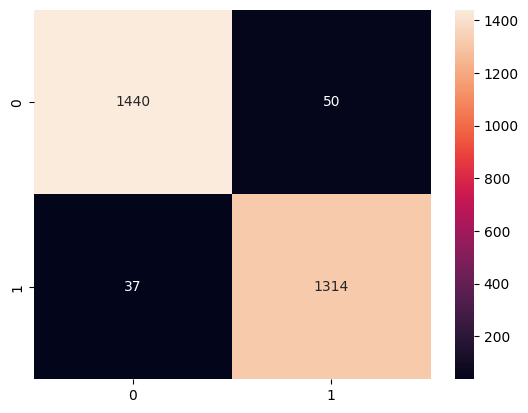

In [67]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1490
         1.0       0.96      0.97      0.97      1351

    accuracy                           0.97      2841
   macro avg       0.97      0.97      0.97      2841
weighted avg       0.97      0.97      0.97      2841



# Gracias por la atención